### Import Functions and Data Set:

In [3]:
# Neccessary functions to import with try/catch to ensure proper imports
try:
    import pandas as pd
    print("Successfully imported pandas")
except ImportError as e:
    print(f"Failed to import pandas: {e}")

try:
    import os
    print("Successfully imported os")
except ImportError as e:
    print(f"Failed to import os: {e}")

try:
    from sklearn.preprocessing import StandardScaler
    print("Successfully imported StandardScaler from sklearn.preprocessing")
except ImportError as e:
    print(f"Failed to import StandardScaler from sklearn.preprocessing: {e}")

try:
    from matplotlib import pyplot as plt
    print("Successfully imported pyplot from matplotlib")
except ImportError as e:
    print(f"Failed to import pyplot from matplotlib: {e}")

try:
    import seaborn as sns
    print("Successfully imported seaborn")
except ImportError as e:
    print(f"Failed to import seaborn: {e}")

try:
    from statistics import mean
    print("Successfully imported mean from statistics")
except ImportError as e:
    print(f"Failed to import mean from statistics: {e}")

try:
    import numpy as np
    print("Successfully imported numpy")
except ImportError as e:
    print(f"Failed to import numpy: {e}")

Successfully imported pandas
Successfully imported os
Successfully imported StandardScaler from sklearn.preprocessing
Successfully imported pyplot from matplotlib
Successfully imported seaborn
Successfully imported mean from statistics
Successfully imported numpy


In [5]:
# Import Data Set into DataFrame StudentHealth
StudentHealth = pd.read_csv("Impact_of_Mobile_Phone_on_Students_Health.csv")
# Clean the column names by stripping leading and trailing whitespace
StudentHealth.columns = StudentHealth.columns.str.strip()

### Analyze & Prepare Data:

In [8]:
# Give General information about the Data Set
StudentHealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Names                           100 non-null    object
 1   Age                             100 non-null    object
 2   Gender                          100 non-null    object
 3   Mobile Phone                    100 non-null    object
 4   Mobile Operating System         100 non-null    object
 5   Mobile phone use for education  98 non-null     object
 6   Mobile phone activities         99 non-null     object
 7   Helpful for studying            98 non-null     object
 8   Educational Apps                98 non-null     object
 9   Daily usages                    99 non-null     object
 10  Performance impact              98 non-null     object
 11  Usage distraction               98 non-null     object
 12  Attention span                  99 non-null     obj

In [10]:
# Insight as to what the Data Set presents like
StudentHealth.head()

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
0,Ali,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Agree,During Exams,Yes,Camera,Yes,Accounting,Headache,Never,Using Blue light filter,Excellent
1,Bilal,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Neutral,During Exams,Yes,Notes Taking App,Yes,Browsing Material,All of these,Sometimes,Taking Break during prolonged use,Good
2,Hammad,21-25,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Strongly agree,Not Distracting,No,Camera,Yes,Browsing Material,All of these,Sometimes,None of Above,Excellent
3,Abdullah,21-25,Male,Yes,Android,Frequently,All of these,Yes,Educational Videos,2-4 hours,Strongly agree,During Class Lectures,No,Internet Access,Only Partially,Reasarch,NaN,Never,Limiting Screen Time,Excellent
4,Waqar,21-25,Male,Yes,IOS,Frequently,All of these,Yes,Educational Videos,> 6 hours,Agree,While Studying,Yes,Internet Access,No,Browsing Material,Sleep disturbance,Sometimes,None of Above,Excellent


In [12]:
# Check to see if any columns have missing data points
StudentHealth.isnull().sum()

Names                             0
Age                               0
Gender                            0
Mobile Phone                      0
Mobile Operating System           0
Mobile phone use for education    2
Mobile phone activities           1
Helpful for studying              2
Educational Apps                  2
Daily usages                      1
Performance impact                2
Usage distraction                 2
Attention span                    1
Useful features                   2
Health Risks                      2
Beneficial subject                1
Usage symptoms                    2
Symptom frequency                 1
Health precautions                1
Health rating                     1
dtype: int64

In [14]:
# Fill missing values with "Unknown"
findblank = StudentHealth.isnull()

for col in findblank:
    StudentHealth[col] = StudentHealth[col].fillna('unknown')

In [16]:
# Check to see if any columns still have missing data points
StudentHealth.isnull().sum()

Names                             0
Age                               0
Gender                            0
Mobile Phone                      0
Mobile Operating System           0
Mobile phone use for education    0
Mobile phone activities           0
Helpful for studying              0
Educational Apps                  0
Daily usages                      0
Performance impact                0
Usage distraction                 0
Attention span                    0
Useful features                   0
Health Risks                      0
Beneficial subject                0
Usage symptoms                    0
Symptom frequency                 0
Health precautions                0
Health rating                     0
dtype: int64

In [18]:
# Convert categorical columns to appropriate data types
categorical_columns = StudentHealth.select_dtypes(include=['object']).columns
for col in categorical_columns:
    StudentHealth[col] = StudentHealth[col].astype('category')

# Check work & preview data
StudentHealth.info()
StudentHealth.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Names                           100 non-null    category
 1   Age                             100 non-null    category
 2   Gender                          100 non-null    category
 3   Mobile Phone                    100 non-null    category
 4   Mobile Operating System         100 non-null    category
 5   Mobile phone use for education  100 non-null    category
 6   Mobile phone activities         100 non-null    category
 7   Helpful for studying            100 non-null    category
 8   Educational Apps                100 non-null    category
 9   Daily usages                    100 non-null    category
 10  Performance impact              100 non-null    category
 11  Usage distraction               100 non-null    category
 12  Attention span         

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
count,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
unique,100,4,2,1,2,5,8,3,5,5,6,5,3,5,4,4,7,5,5,8
top,Aammar,21-25,Male,Yes,Android,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Agree,While Studying,Yes,Internet Access,Yes,Reasarch,All of these,Sometimes,Limiting Screen Time,Good
freq,1,72,81,100,81,53,59,94,54,40,40,34,70,70,57,48,32,52,35,42


### Visualize Data Distributions:

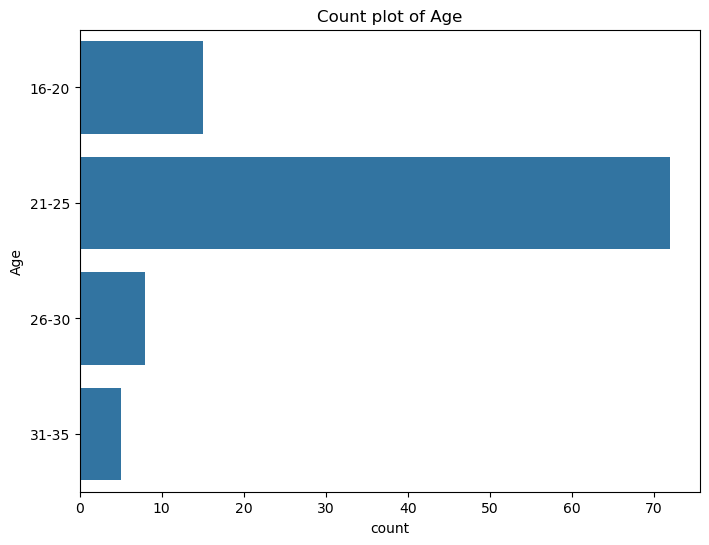

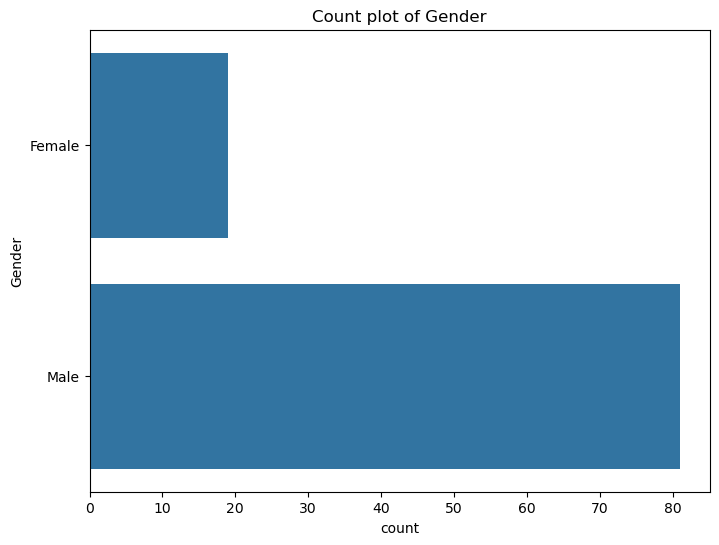

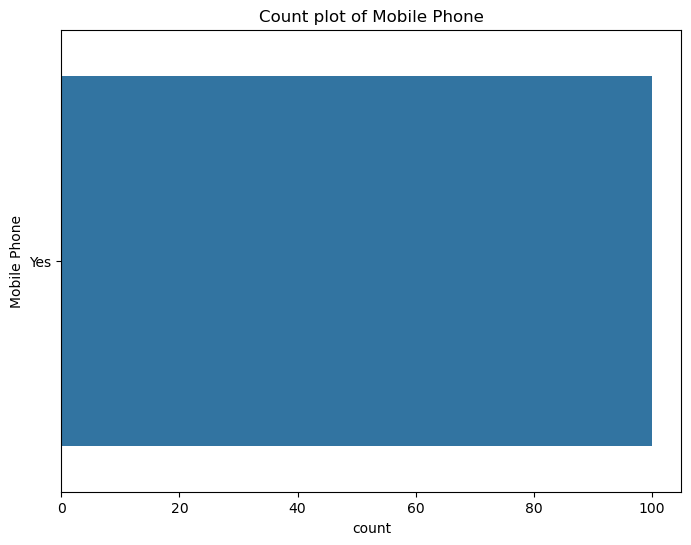

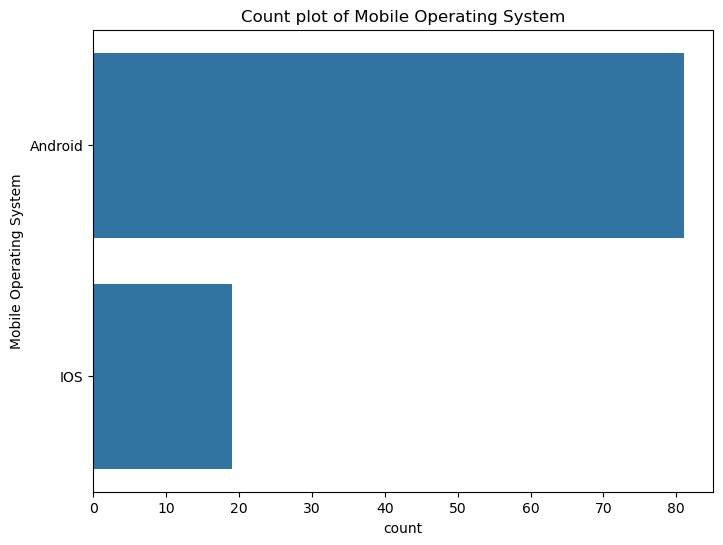

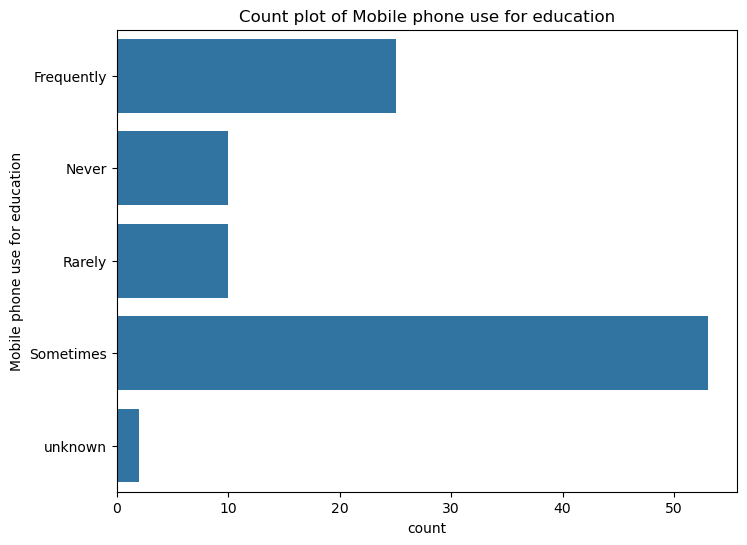

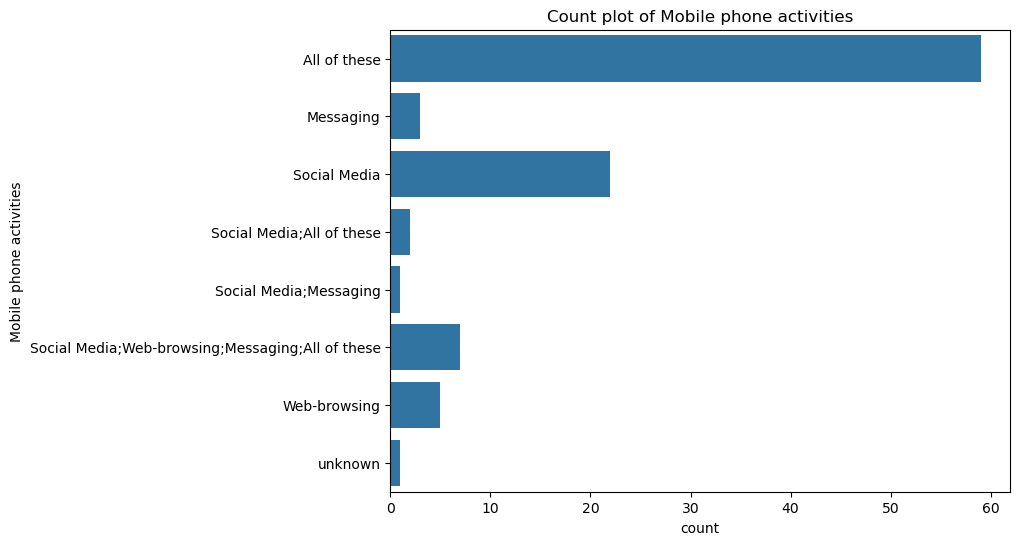

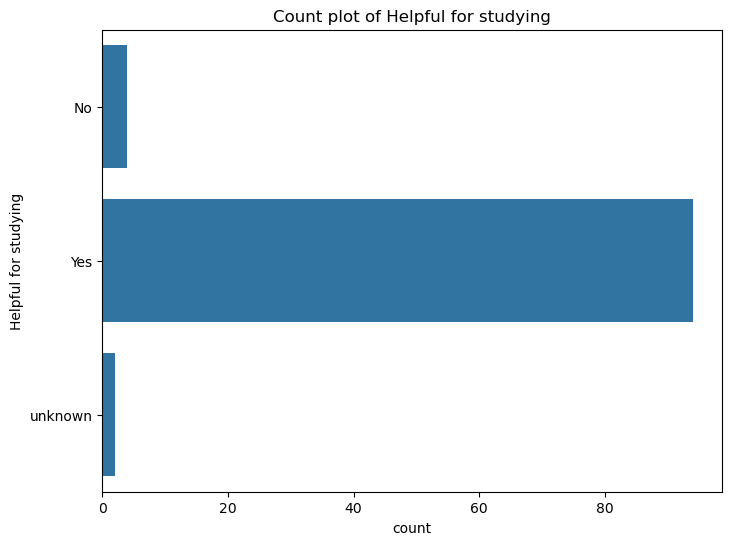

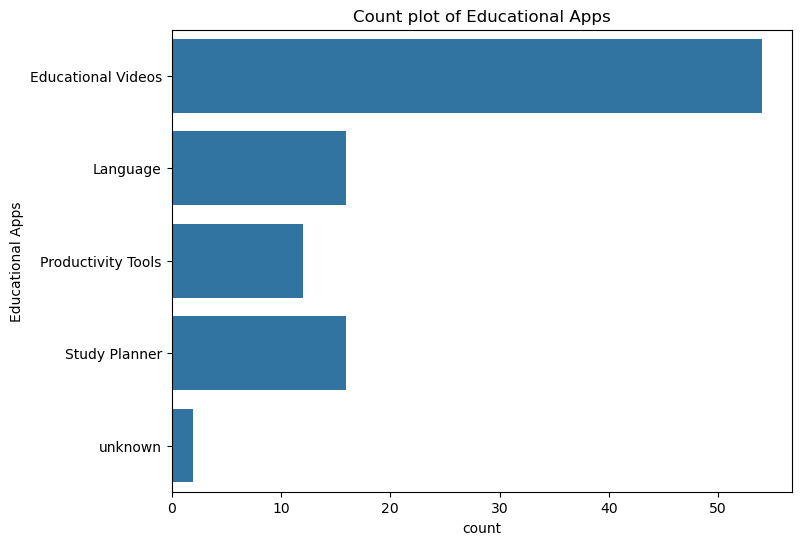

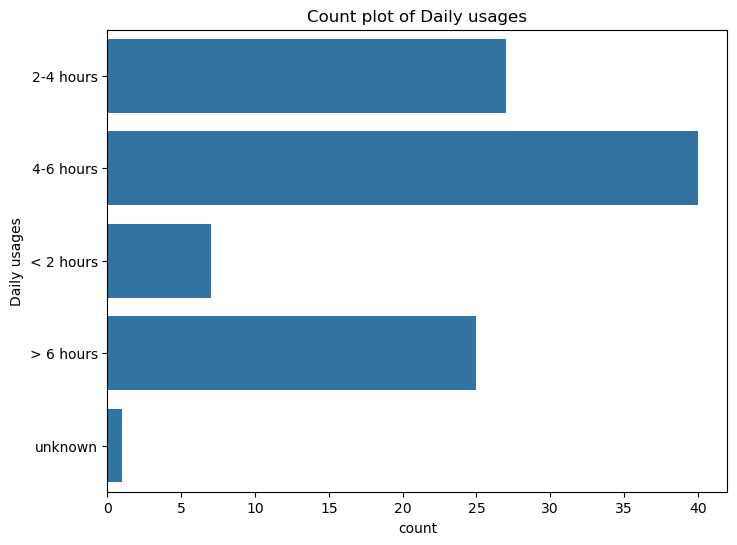

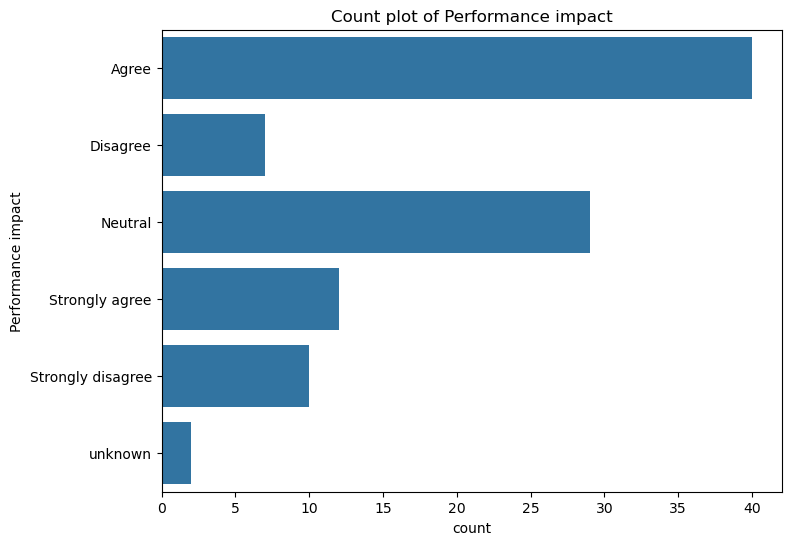

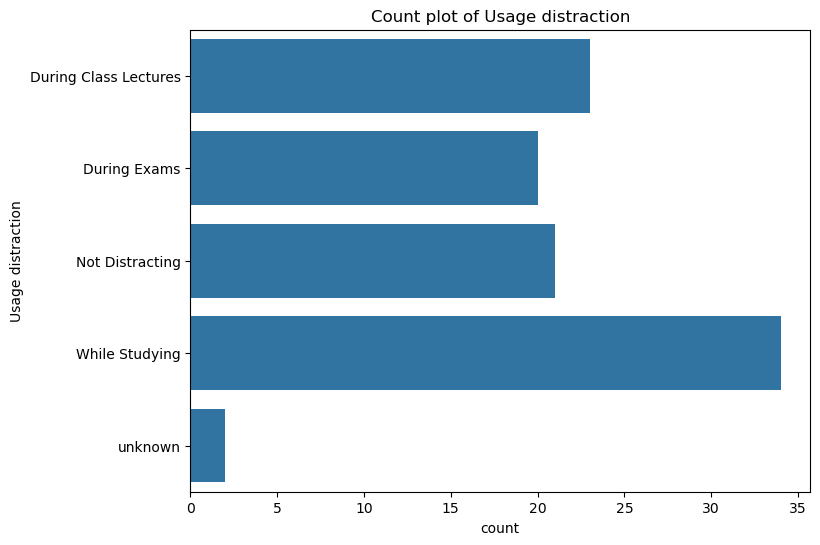

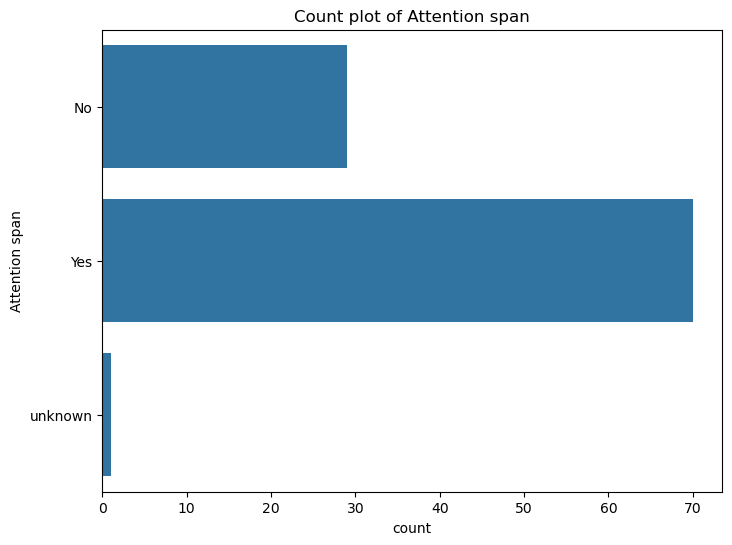

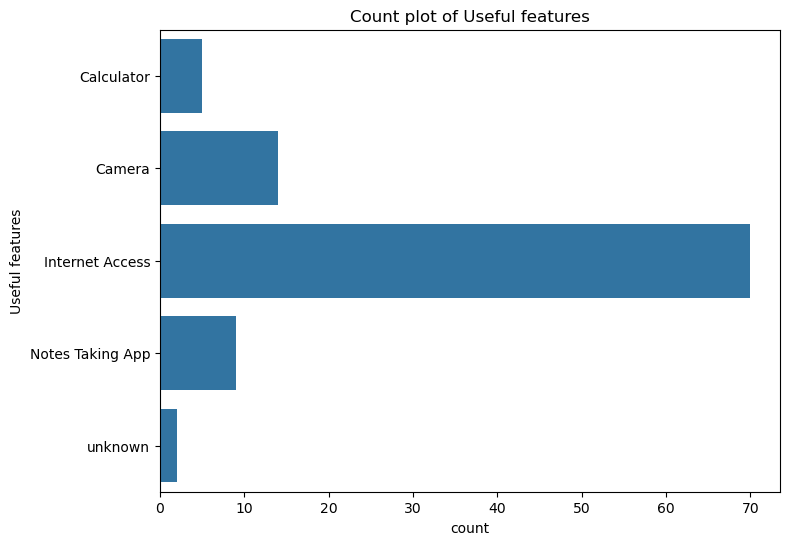

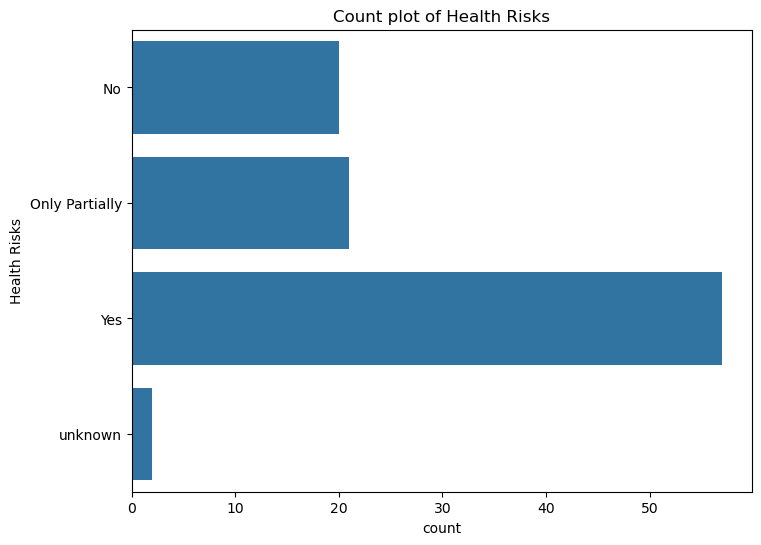

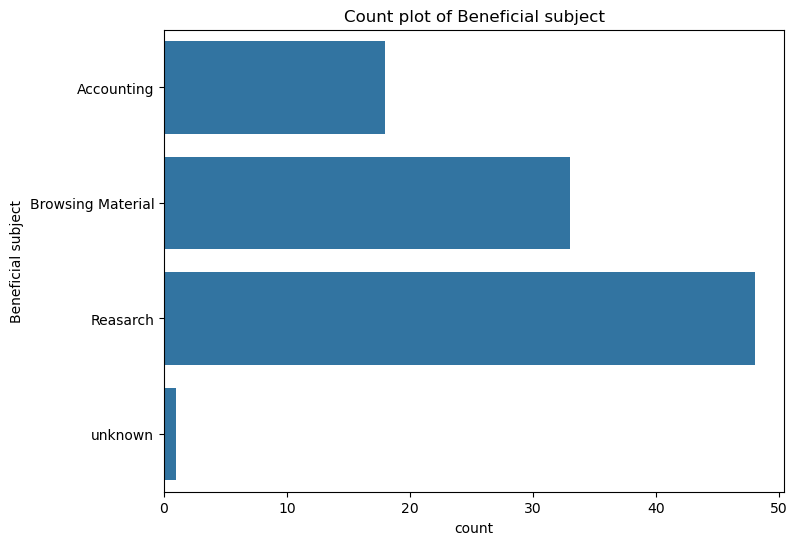

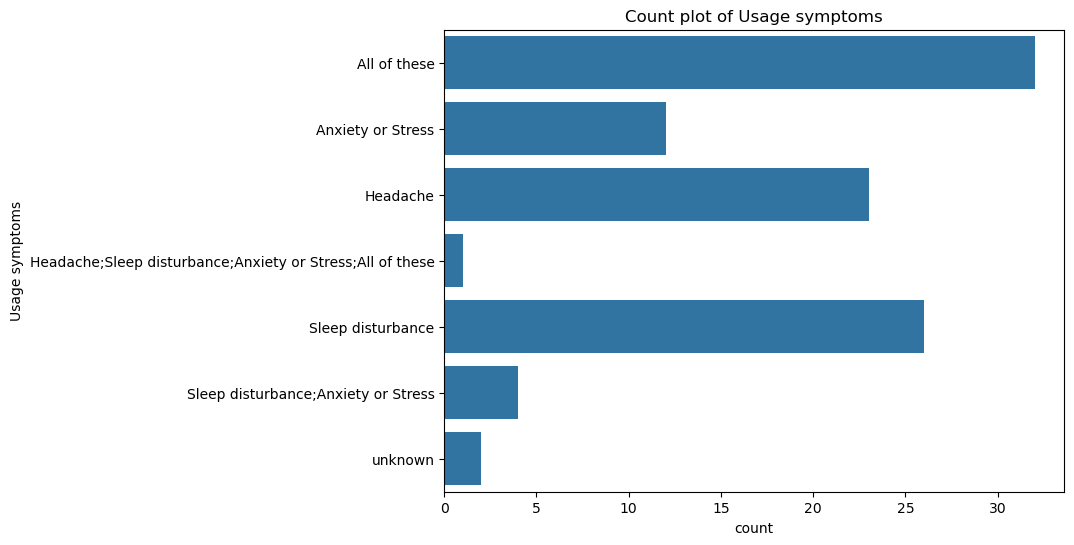

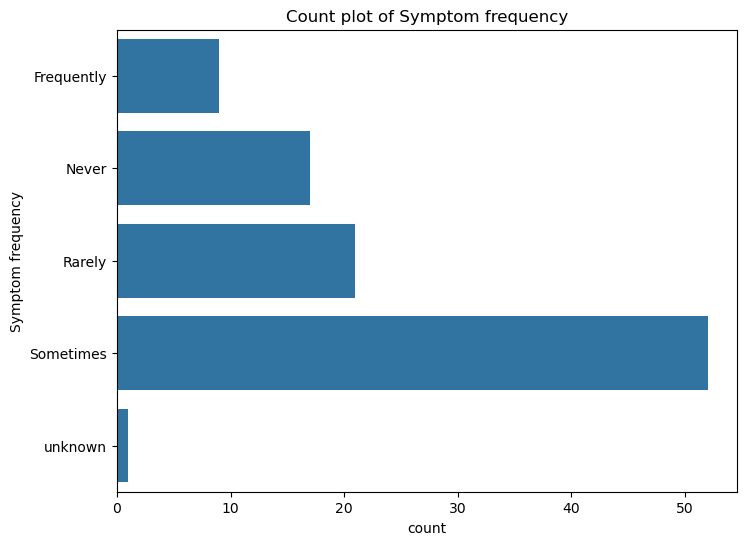

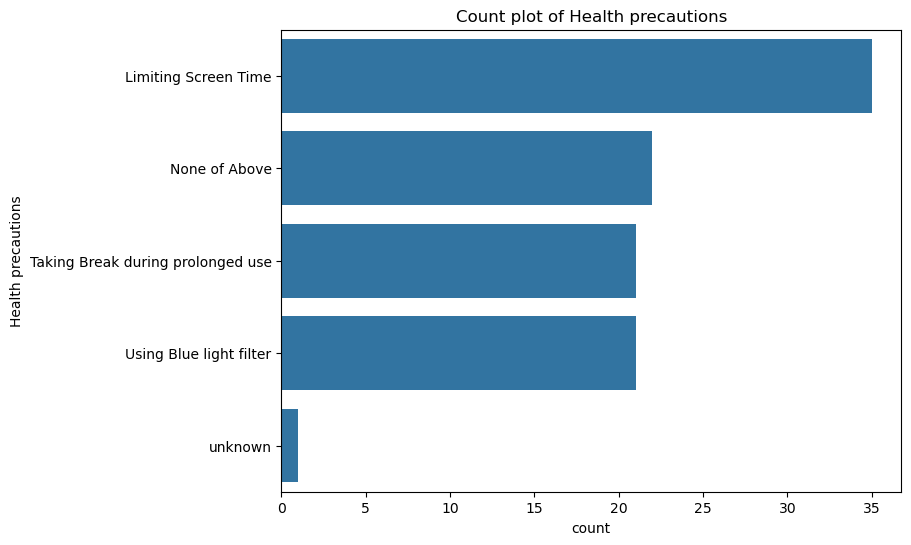

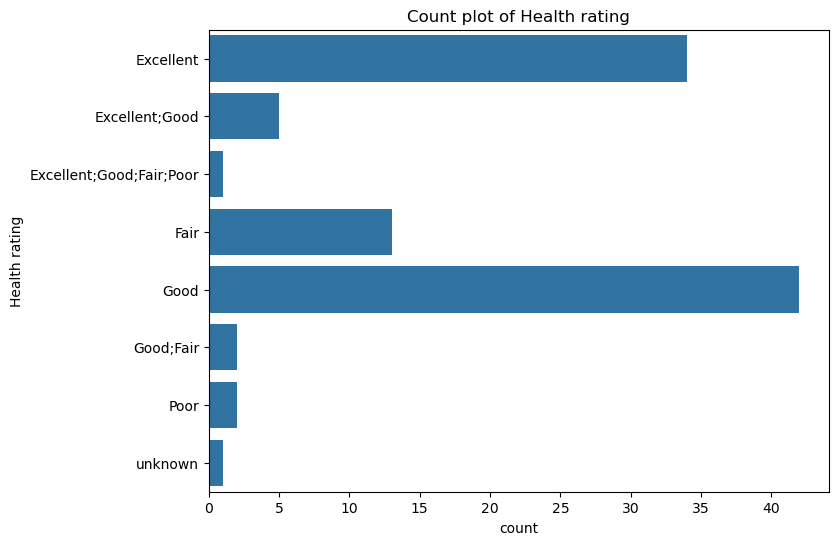

In [21]:
categorical_columns = StudentHealth.select_dtypes(include=['category']).columns
for i, col in enumerate(categorical_columns):
    if i == 0:  # Skip the 'Names' column
        continue
    else:
        plt.figure(figsize=(8, 6))
        sns.countplot(y=col, data=StudentHealth)
        plt.title(f'Count plot of {col}')
        plt.show()

##### Initial Conclusions:

- Upon viewing each graph, the 'Name' and 'Mobile Phone' columns are both revealed to be redundant, as each name is unique and all who participated in the study use a mobile phone.
- Nearly all students find mobile phones useful for studying.
- A majority of students beleive their mobile phones impact their academic performance, either positively or negatively.
- A majority of students beleive their mobile phones affect their attention span.
- A majority of students feel some type of negative symptoms at some point, at varying frequencies.

In [25]:
# Remove redundant columns
StudentHealth = StudentHealth.drop(columns=['Names', 'Mobile Phone'])
# Check work
StudentHealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Age                             100 non-null    category
 1   Gender                          100 non-null    category
 2   Mobile Operating System         100 non-null    category
 3   Mobile phone use for education  100 non-null    category
 4   Mobile phone activities         100 non-null    category
 5   Helpful for studying            100 non-null    category
 6   Educational Apps                100 non-null    category
 7   Daily usages                    100 non-null    category
 8   Performance impact              100 non-null    category
 9   Usage distraction               100 non-null    category
 10  Attention span                  100 non-null    category
 11  Useful features                 100 non-null    category
 12  Health Risks           

#### Set Data Against Each Other to Gain Additional Insights:

##### How Does Daily Usage Impact Students?

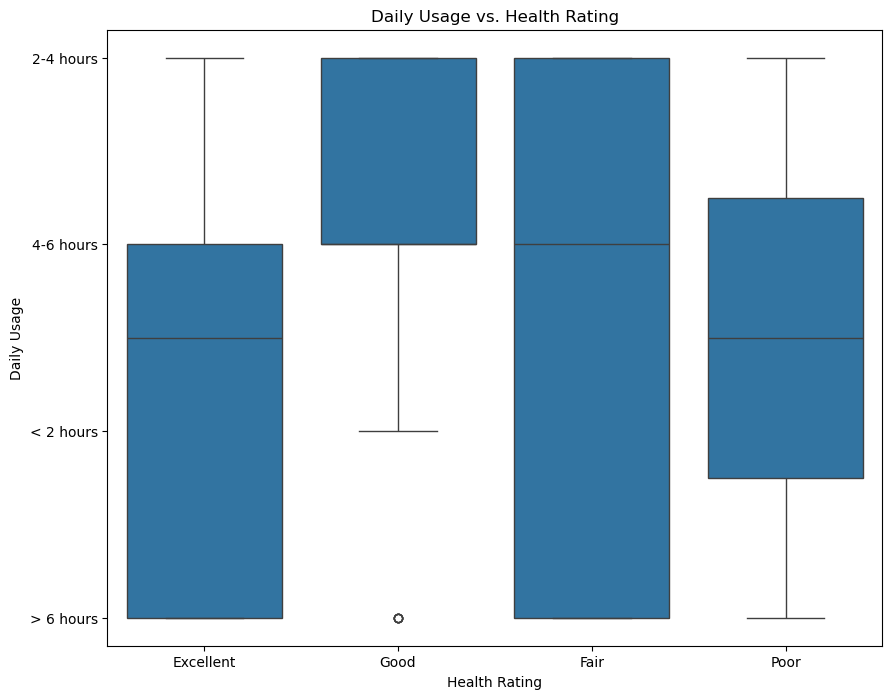

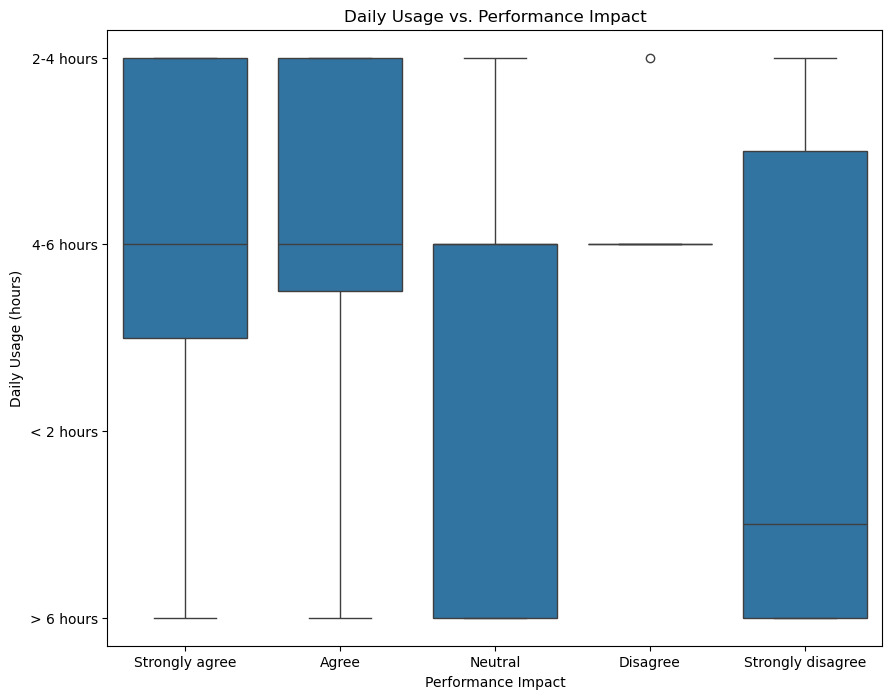

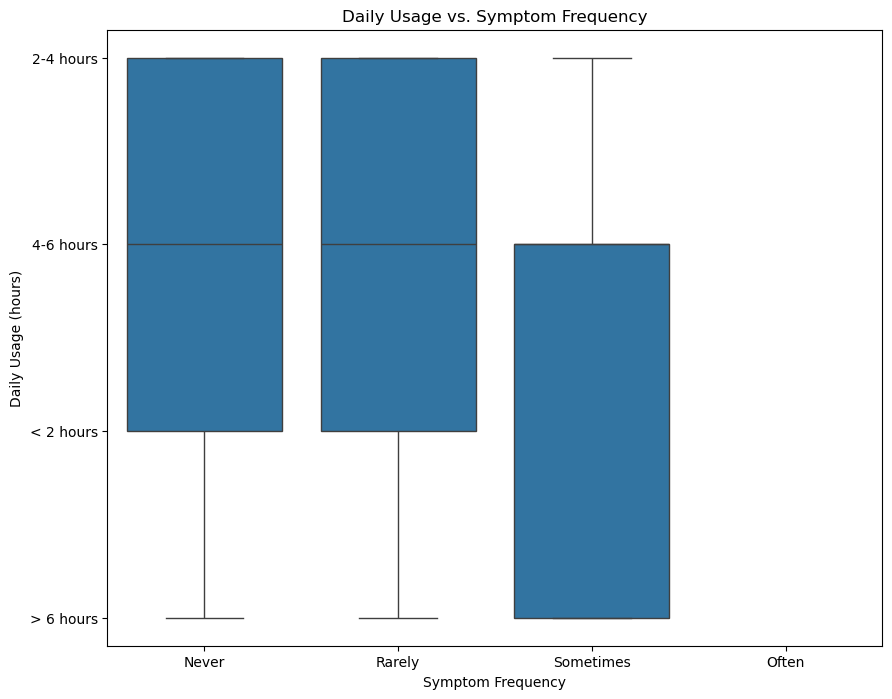

In [29]:
# Daily Usage vs. Health Rating
plt.figure(figsize=(10, 8))
# Filter out rows with 'unknown' in 'Health Rating' and 'Daily Usages'
filtered_data = StudentHealth[(StudentHealth['Health rating'] != 'unknown') & (StudentHealth['Daily usages'] != 'unknown')]
# Specify categories
category_order = ['Excellent', 'Good', 'Fair', 'Poor']
# Compare Health Rating based on Daily Usage
sns.boxplot(x='Health rating', y='Daily usages', data=filtered_data, order=category_order)
plt.title('Daily Usage vs. Health Rating')
plt.xlabel('Health Rating')
plt.ylabel('Daily Usage')
plt.show()

# Compare Performance Impact based on Daily Usage
plt.figure(figsize=(10, 8))
# Filter out rows with 'unknown' in 'Performance impact' and 'Daily usages'
filtered_data = StudentHealth[(StudentHealth['Performance impact'] != 'unknown') & (StudentHealth['Daily usages'] != 'unknown')]
# Specify categories
category_order = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree']
# Compare Daily Usage vs. Performance Impact
sns.boxplot(x='Performance impact', y='Daily usages', data=filtered_data, order=category_order)
plt.title('Daily Usage vs. Performance Impact')
plt.xlabel('Performance Impact')
plt.ylabel('Daily Usage (hours)')
plt.show()

# Filter out rows with 'unknown' in 'Daily usages' and 'Symptom frequency'
filtered_data = StudentHealth[(StudentHealth['Daily usages'] != 'unknown') & (StudentHealth['Symptom frequency'] != 'unknown')]
# Specify categories for Symptom Frequency if needed (this step is optional, depends on your data)
category_order = ['Never', 'Rarely', 'Sometimes', 'Often']
# Compare Daily Usage vs. Symptom Frequency
plt.figure(figsize=(10, 8))
sns.boxplot(x='Symptom frequency', y='Daily usages', data=filtered_data, order=category_order)
plt.title('Daily Usage vs. Symptom Frequency')
plt.xlabel('Symptom Frequency')
plt.ylabel('Daily Usage (hours)')
plt.show()

##### General Observations:

- Daily Usage vs. Health Rating:
Students with an "Excellent" health rating predominantly use their phones between 2-6 hours daily, with few exceptions going beyond 6 hours.
Students with "Good" and "Fair" health ratings show varied usage, extending from less than 2 hours to over 6 hours.
Those with a "Poor" health rating tend to use their phones for less than 4 hours daily.

- Daily Usage vs. Performance Impact:
Students who "Strongly Agree" and "Agree" that mobile phone usage impacts performance have higher and more variable daily usage.
Those who "Disagree" have more consistent and lower daily usage.
The "Neutral" group falls in between, with some outliers indicating more than 6 hours of usage.

- Daily Usage vs. Symptom Frequency:
Students who "Never" or "Rarely" experience symptoms have similar daily usage patterns, with medians around 4 hours and a wide range of usage times.
Those who report experiencing symptoms "Sometimes" tend to have higher daily usage, with a median of around 5 hours and significant spread towards higher usage.

##### Do Taking Health Precautions Help?

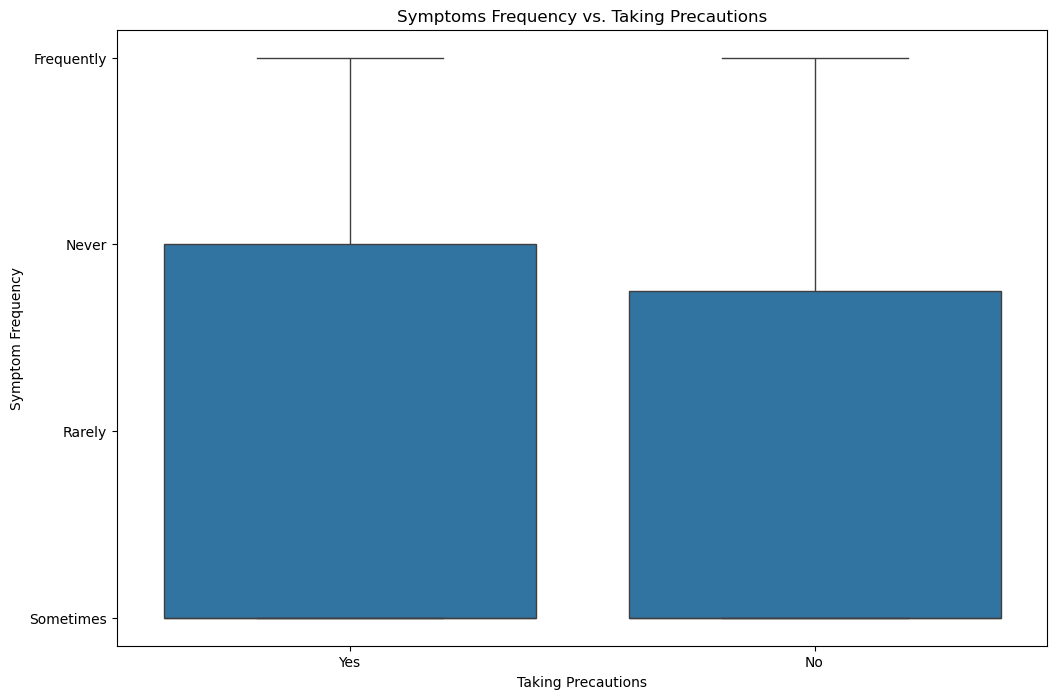

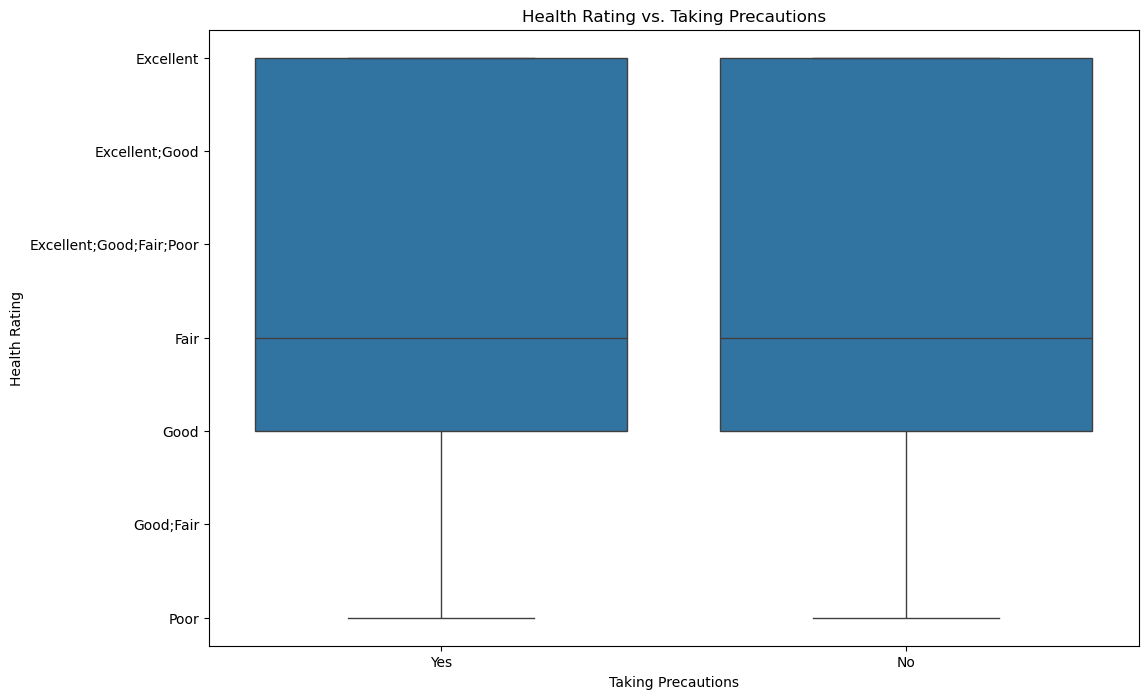

In [41]:
# Remove unknown from relevant columns
StudentHealth = StudentHealth[
    (StudentHealth['Health rating'] != 'unknown') & 
    (StudentHealth['Daily usages'] != 'unknown') & 
    (StudentHealth['Symptom frequency'] != 'unknown') & 
    (StudentHealth['Health precautions'] != 'unknown')
]

# Categorize 'Health precautions' into binary categories
StudentHealth['Taking Precautions'] = StudentHealth['Health precautions'].apply(lambda x: 'Yes' if x != 'None of Above' else 'No')

# Compare Symptom Frequency based on Taking Precautions
plt.figure(figsize=(12, 8))
sns.boxplot(x='Taking Precautions', y='Symptom frequency', data=StudentHealth)
plt.title('Symptoms Frequency vs. Taking Precautions')
plt.xlabel('Taking Precautions')
plt.ylabel('Symptom Frequency')
plt.show()

# Compare Health Rating based on Taking Precautions
plt.figure(figsize=(12, 8))
sns.boxplot(x='Taking Precautions', y='Health rating', data=StudentHealth)
plt.title('Health Rating vs. Taking Precautions')
plt.xlabel('Taking Precautions')
plt.ylabel('Health Rating')
plt.show()

##### General Observations:

- Symptoms Frequency vs Taking Precautions: The median symptom frequency is "Rarely" for both groups, indicating that taking precautions does not significantly alter the frequency of symptoms experienced by students. The variability in symptom frequency is high for both groups, suggesting other factors might be influencing symptom frequency besides taking precautions.

- Health Rating vs Taking Precautions: The median health rating is "Good" for both groups, suggesting that taking precautions does not significantly alter the overall health ratings among students. The variability in health ratings is high for both groups, indicating that health ratings are influenced by multiple factors beyond just taking precautions.

##### Do Mobile Phones Help?

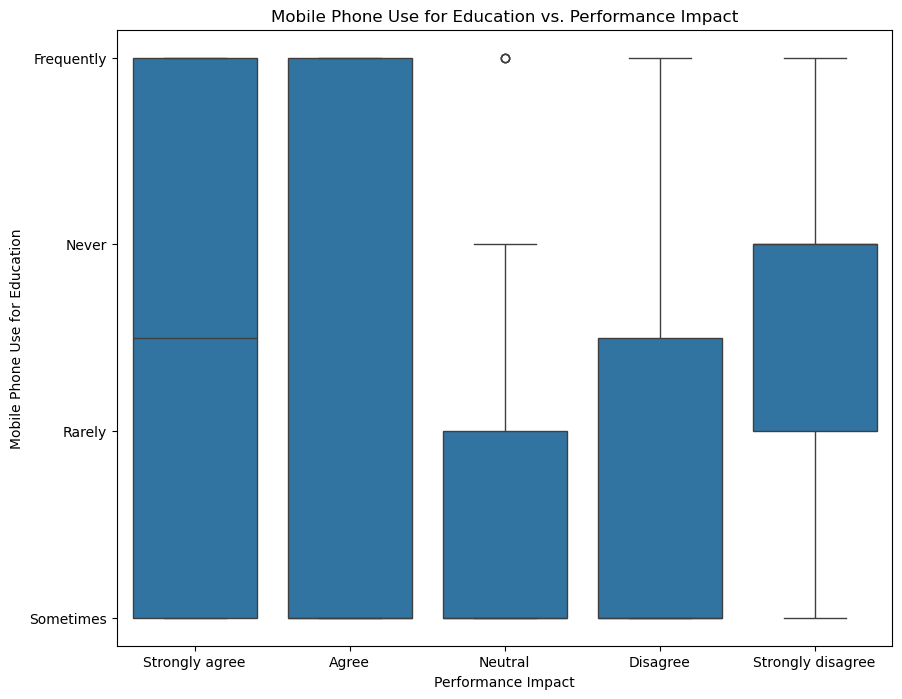

In [217]:
# Filter out rows with 'unknown' in 'Mobile phone use for education' and 'Performance impact'
filtered_data = StudentHealth[(StudentHealth['Mobile phone use for education'] != 'unknown') & (StudentHealth['Performance impact'] != 'unknown')]
# Specify categories for Performance Impact if needed (this step is optional, depends on your data)
category_order = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree']
# Compare Mobile Phone Use for Education vs. Performance Impact
plt.figure(figsize=(10, 8))
sns.boxplot(x='Performance impact', y='Mobile phone use for education', data=filtered_data, order=category_order)
plt.title('Mobile Phone Use for Education vs. Performance Impact')
plt.xlabel('Performance Impact')
plt.ylabel('Mobile Phone Use for Education')
plt.show()

##### General Observations: 

- Students who "Agree" and "Strongly Agree" that mobile phone use impacts performance tend to use their phones more frequently for educational purposes.
- Those who are "Neutral" or "Disagree" show varied and generally lower usage patterns for educational purposes.
- The median usage for education decreases as the agreement with the performance impact statement decreases, suggesting a correlation between higher educational usage of mobile phones and perceived performance impact.

### Final Conclusions:

After the initial data exploration process, the following conclusions can be made about the data set:

**Health:** 
- Increased mobile phone use, particularly more than 4-6 hours daily, is associated with poorer health ratings and more frequent symptoms. 
- Students who take health precautions do not significantly differ in health outcomes from those who do not, suggesting the need for more effective strategies or other influencing factors.

**Academic Performance:** 
- High and variable mobile phone usage correlates with a stronger perception of performance impact, whether positive or negative. 
- Students who use their phones more frequently for educational purposes are more likely to perceive a significant impact on their academic performance.

**Predictability:** 
- Based on the findings above, both health ratings and academic performance impacts could be reasonably predicted. See below for results.

#### Overall Reccomendations:

- Encouraging moderate phone usage (2-4 hours) could potentially lead to better health ratings and lower symptom frequency among students.
- Awareness programs about the impact of high mobile phone usage on health and performance might help students manage their usage better.
- Implementing and promoting health precautions like using blue light filters, taking breaks during prolonged use, and limiting screen time could mitigate health risks associated with mobile phone usage.